In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from openpyxl.reader.excel import load_workbook

# Exploit the datas from Excel

In [2]:
# Opening the Excel file with data
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []

# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income

    cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    y.append(sheet.cell(row=num+1,column=16).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 654):
    valx, valy = read(j)
    if "?" in valx:
        print(j, read(j))
    x_data.append(valx)    
    y_data.append(valy)

print(x_data, y_data)

[[1, 30.83, 0, 0, 0, 8, 0, 1.25, 1, 1, 1, 0, 0, 202, 0], [0, 58.67, 4.46, 0, 0, 7, 1, 3.04, 1, 1, 6, 0, 0, 43, 560], [0, 24.5, 0.5, 0, 0, 7, 1, 1.5, 1, 0, 0, 0, 0, 280, 824], [1, 27.83, 1.54, 0, 0, 8, 0, 3.75, 1, 1, 5, 1, 0, 100, 3], [1, 20.17, 5.625, 0, 0, 8, 0, 1.71, 1, 0, 0, 0, 2, 120, 0], [1, 32.08, 4, 0, 0, 5, 0, 2.5, 1, 0, 0, 1, 0, 360, 0], [1, 33.17, 1.04, 0, 0, 6, 1, 6.5, 1, 0, 0, 1, 0, 164, 31285], [0, 22.92, 11.585, 0, 0, 0, 0, 0.04, 1, 0, 0, 0, 0, 80, 1349], [1, 54.42, 0.5, 1, 1, 4, 1, 3.96, 1, 0, 0, 0, 0, 180, 314], [1, 42.5, 4.915, 1, 1, 8, 0, 3.165, 1, 0, 0, 1, 0, 52, 1442], [1, 22.08, 0.83, 0, 0, 0, 1, 2.165, 0, 0, 0, 1, 0, 128, 0], [1, 29.92, 1.835, 0, 0, 0, 1, 4.335, 1, 0, 0, 0, 0, 260, 200], [0, 38.25, 6, 0, 0, 4, 0, 1, 1, 0, 0, 1, 0, 0, 0], [1, 48.08, 6.04, 0, 0, 4, 0, 0.04, 0, 0, 0, 0, 0, 0, 2690], [0, 45.83, 10.5, 0, 0, 7, 0, 5, 1, 1, 7, 1, 0, 0, 0], [1, 36.67, 4.415, 1, 1, 4, 0, 0.25, 1, 1, 10, 1, 0, 320, 0], [1, 28.25, 0.875, 0, 0, 5, 0, 0.96, 1, 1, 3, 1, 0, 396,

# Generate Random Number for Shuffling

In [3]:
import random
from random import shuffle
random.seed(455534) # random number generator, a specific random number will be used in every iteration of the code
toshuffle = list(zip(x_data, y_data)) #zip x and y (keeps x and y together)
shuffle(toshuffle) # shuffle
x_data, y_data = zip(*toshuffle) # open the shuffled data sets

# Model Evaluation using Confusion Matrix

In [4]:
# import the class
from sklearn.linear_model import LogisticRegression

# ~ 15% test ; ~ 85% train
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets


# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
y_pred=logreg.predict(test_x)


from sklearn import metrics    # import the metrics class
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[55,  9],
       [ 3, 33]], dtype=int64)

# Visualizing Confusion Matrix using Heatmap

Text(0.5, 15.0, 'Predicted label')

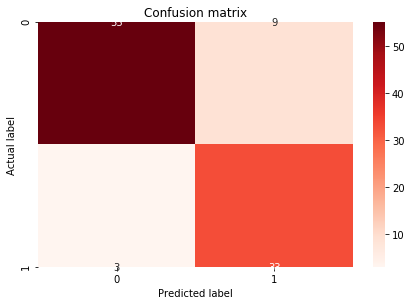

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# put the major ticks at the middle of each cell
#data = np.random.rand(2,2)
#ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
#ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)


plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds', fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [5]:
print(y_pred)

[1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0]


# Confusion Matrix Evaluation Metrics

In [6]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred)*100)



Accuracy: 88.0


# ROC Curve

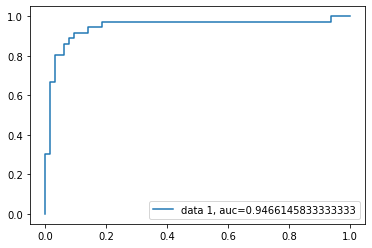

In [7]:
y_pred_proba = logreg.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Tuning Parameters: Gridsearch algorithm 

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from time import time

x, y = x_data, y_data
x, y = np.asarray(x), np.asarray(y)

clf = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid = GridSearchCV(clf, param_grid, scoring = 'recall')
grid.fit(x, y.ravel())



#Predict values based on new parameters
y_pred = grid.predict(test_x)


# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(test_y, y_pred)*100))
print('Precision Score : ' + str(precision_score(test_y, y_pred)*100))
print('Recall Score : ' + str(recall_score(test_y, y_pred)*100))
print('F1 Score : ' + str(f1_score(test_y, y_pred)*100))


#Logistic Regression (Grid Search) Confusion matrix
print("\n\nConfusion Matrix : \n", confusion_matrix(test_y, y_pred))
          
# grid = GridSearchCV(pipe, param_grid, cv = 5, verbose=True, n_jobs=-1) 
# start = time()  
# fitting the model for grid search 
# grid.fit(x, y.ravel()) 



Accuracy Score : 88.0
Precision Score : 78.57142857142857
Recall Score : 91.66666666666666
F1 Score : 84.61538461538461


Confusion Matrix : 
 [[55  9]
 [ 3 33]]


C:\Users\selip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\selip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\selip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\selip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\selip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to